In [146]:
from helpers import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
articles, categories, links, paths_finished, paths_unfinished, paths_all, shortest_path_distance = load_data()
G_paths, G_links = get_graphs(paths_all,links)
G_paths_finished, _ = get_graphs(paths_finished,links)
G_paths_unfinished, _ = get_graphs(paths_unfinished,links)

In [73]:
def get_in_out_degree(G, page) :
    in_deg = G.in_degree(page, 'weight')
    in_deg = in_deg if in_deg else 0
    out_deg = G.out_degree(page, 'weight')
    out_deg = out_deg if out_deg else 0
    
    return [in_deg, out_deg]
get_in_out_degree(G_paths, 'Áedán_mac_Gabráin') 

[0, 0]

In [108]:
def add_in_out_deg(cat, G):
    cat['in_deg'] = cat.article.apply(
        lambda art: get_in_out_degree(G, art)[0])
    cat['out_deg'] = cat.article.apply(
        lambda art: get_in_out_degree(G, art)[1])
    return cat

def split_cat(cat):
    cat['splitted_cat'] = cat.category.apply(lambda x : x.split('.')[1:])
    return cat

def get_sum_in_out_by_cat(cat):
    cat = cat.explode('splitted_cat')
    cat = cat.groupby('splitted_cat').apply(lambda x : pd.Series({
        'sum_in_deg' : x.in_deg.sum(),
        'sum_out_deg' : x.out_deg.sum() 
    }))
    return cat

def get_cat_summary(cat, G):
    cat=add_in_out_deg(cat, G)
    cat = split_cat(cat)
    cat = get_sum_in_out_by_cat(cat)
    return cat
categories_finished = categories.copy()
categories_unfinished = categories.copy()

categories_finished= get_cat_summary(categories_finished, G_paths_finished)
categories_unfinished= get_cat_summary(categories_unfinished, G_paths_unfinished)

categories_finished = categories_finished/len(paths_finished)*1000
categories_unfinished = categories_unfinished/len(paths_unfinished)*1000

categories_finished = categories_finished.rename(columns = {'sum_in_deg'  : 'frac_in_deg_finished',
                                                  'sum_out_deg' : 'frac_out_deg_finished'})
categories_unfinished = categories_unfinished.rename(columns ={'sum_in_deg'  : 'frac_in_deg_unfinished',
                                                  'sum_out_deg' : 'frac_out_deg_unfinished'})

In [125]:
categories_all = categories_finished.join(categories_unfinished)

In [149]:
categories_all['diff_in'] = categories_all.apply(lambda x: 
            (x.frac_in_deg_finished - x.frac_in_deg_unfinished) , axis = 1)
categories_all['diff_out'] = categories_all.apply(lambda x: 
            (x.frac_out_deg_finished - x.frac_out_deg_unfinished), axis = 1)
categories_all['weighted_diff_in'] = categories_all.apply(lambda x: 
            (x.frac_in_deg_finished - x.frac_in_deg_unfinished) /(x.frac_in_deg_finished + x.frac_in_deg_unfinished), axis = 1)
categories_all['weighted_diff_out'] = categories_all.apply(lambda x: 
            (x.frac_out_deg_finished - x.frac_out_deg_unfinished) /(x.frac_out_deg_finished + x.frac_out_deg_unfinished), axis = 1)

In [159]:
categories_all.head(5)

,frac_in_deg_finished,frac_out_deg_finished,frac_in_deg_unfinished,frac_out_deg_unfinished,weighted_diff_in,weighted_diff_out,diff_in,diff_out
splitted_cat,,,,,,,,
Actors_models_and_celebrities,3.819323,6.742274,3.618090,5.708543,0.027057,0.083025,0.201232,1.033731
African_Countries,75.373163,69.137535,46.673367,41.688442,0.235155,0.247677,28.699797,27.449092
African_Geography,168.206088,163.821661,99.376884,93.829146,0.257226,0.271656,68.829203,69.992515
Air_and_Sea_transport,13.620952,14.186056,9.728643,12.341709,0.166697,0.069525,3.892308,1.844347
Ancient_History_Classical_History_and_Mythology,96.769165,96.515842,75.819095,70.231156,0.121388,0.157632,20.950069,26.284687


## Plots 
### Histogram of the difference between of node in/out degree between finished and unfineshed graphs
Now that we have all the features we needed we can start looking at results. 

First we plot the difference between of node in/out degree between finished and unfineshed graphs. We can see that there are no concepts where people get more stuck in unfinished paths than in finished. However, we can see that finished paths have concepts where we can go that may bu usefull and help the players find their way.

### Histogram of the weighted difference between of node in/out degree between finished and unfineshed graphs
However from this it is not really relevent because we have to ~normalize~ the values to see significant relevance 

From this we can see that there are some concepts that are more used in the unfinished paths that are all related to art/movies/theatre. On the other hand, some concepts like History/chemistry are more used in finished paths 

### Histogram of the weighted difference between of node in/out degree of big concepts between finished and unfineshed graphs
Finally we want to see only the difference in big concepts - concepts that often appear. For this we reduced the concepts we look at to only concepts that have at least   

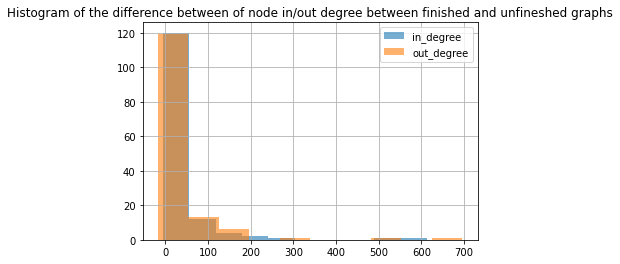

In [150]:
categories_all.diff_in.hist(alpha = 0.6, label = 'in_degree').set_title('Histogram of the difference between of node in/out degree between finished and unfineshed graphs')
categories_all.diff_out.hist(alpha = 0.6, label = 'out_degree')
plt.legend()

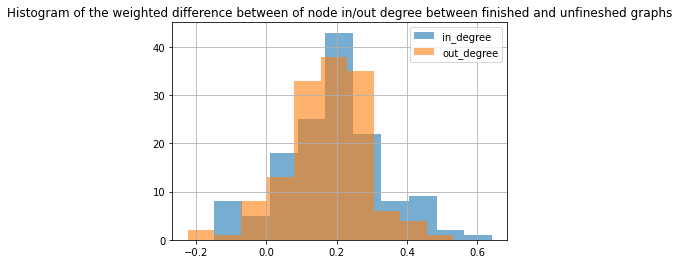

In [148]:
categories_all.weighted_diff_in.hist(alpha = 0.6, label = 'in_degree').set_title('Histogram of the weighted difference between of node in/out degree between finished and unfineshed graphs')
categories_all.weighted_diff_out.hist(alpha = 0.6, label = 'out_degree')
plt.legend()

In [141]:
categories_all[categories_all['weighted_diff_in'] < 0].weighted_diff_in.sort_values()

splitted_cat
Theatre                                 -0.147774
Community_organisations                 -0.123478
Railway_transport                       -0.105650
Cartoons                                -0.096721
Producers_directors_and_media_figures   -0.082096
Literature_types                        -0.080334
Sports                                  -0.080277
Television                              -0.072007
General_Literature                      -0.067757
Films                                   -0.057470
Culture_and_Diversity                   -0.048396
Sports_events                           -0.034184
Name: weighted_diff_in, dtype: float64

In [143]:
categories_all[categories_all['weighted_diff_in'] > 0.3].weighted_diff_in.sort_values()

splitted_cat
Chemical_compounds                                         0.308955
Plants                                                     0.312825
Space_Astronomy                                            0.318612
Space_transport                                            0.326906
Performers_and_composers                                   0.328264
Antarctica                                                 0.348450
World_War_II                                               0.380511
Geography_of_the_Middle_East                               0.383165
Political_People                                           0.391383
Monarchs_of_Great_Britain                                  0.394168
Games                                                      0.395442
Middle_Eastern_Countries                                   0.408645
Religious_disputes                                         0.413198
British_History_1500_and_before_including_Roman_Britain    0.434188
Musical_Instruments                

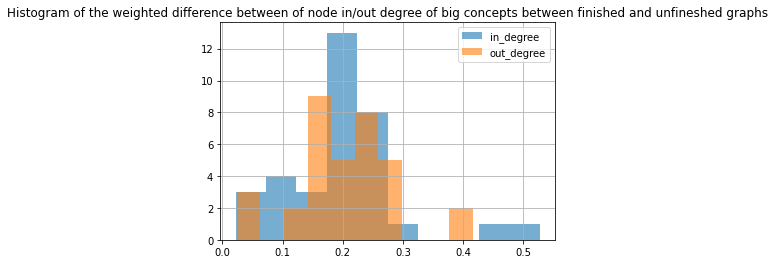

In [158]:
categories_all[categories_all.frac_in_deg_finished > 100].weighted_diff_in.hist(alpha = 0.6, label = 'in_degree').set_title('Histogram of the weighted difference between of node in/out degree of big concepts between finished and unfineshed graphs')
categories_all[categories_all.frac_in_deg_finished > 100].weighted_diff_out.hist(alpha = 0.6, label = 'out_degree')
plt.legend()

In [160]:
categories_all[categories_all.frac_in_deg_finished > 100][categories_all['weighted_diff_in'] >0.25].weighted_diff_in.sort_values()

C:\Users\mathi\AppData\Local\Temp/ipykernel_17936/3406451549.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categories_all[categories_all.frac_in_deg_finished > 100][categories_all['weighted_diff_in'] >0.25].weighted_diff_in.sort_values()


splitted_cat
People               0.254341
Geography_of_Asia    0.255236
African_Geography    0.257226
Physics              0.262703
British_History      0.272200
Engineering          0.273548
Space_Astronomy      0.318612
Chemistry            0.473940
Chemical_elements    0.527773
Name: weighted_diff_in, dtype: float64